In [1]:
import cv2
import numpy as np
import dlib
import time
from facial_landmarks import get_regular_landmark_points, get_dense_landmark_points
from swap import swap_with_keypoints
import matplotlib.pyplot as plt

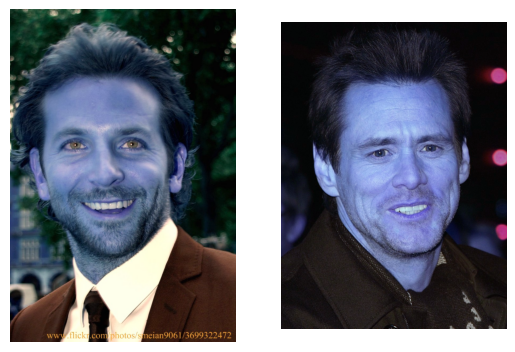

In [2]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
def plot_points(image, points):
    for point in  points:
        x,y=point
        image = cv2.circle(image, (x,y), radius=2, color=(0, 0, 255), thickness=-1)
        
image_path = "bradley_cooper.jpg"
image_path2 = "jim_carrey.jpg"
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
img2 = cv2.imread(image_path2)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)

fig = plt.figure()
fig.add_subplot(1,2,1)
# plt.figure()
plt.axis('off')
plt.imshow(img)
# plt.figure()
fig.add_subplot(1,2,2)
plt.axis('off')
plt.imshow(img2)
plt.show()

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/ssd/Precision-Image-Face-Swapping-With-OpenCV/shape_predictor_68_face_landmarks.dat")
height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)

# Face 1
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        # if not (61>n>54 or n>63): # Low_lip
        # if not (65>n>59 or n>63):#((65>n>59 )or (48<n<55)): # High_lip
        #     continue
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # img = cv2.circle(img, (x,y), radius=2, color=(0, 0, 255), thickness=-1)
        landmarks_points.append((x, y))

# Face 2
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        # if not (61>n>54 or n>63): # Low_lip
        # if not ((65>n>59 )or (48<n<55)): # High_lip
        #     continue
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))

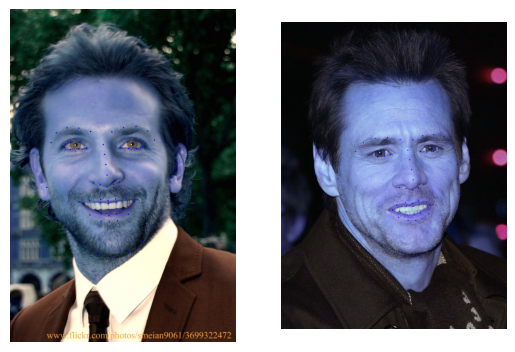

In [4]:
# landmarks_points = get_dense_landmarks_points(image_path)
# landmarks_points2 = get_dense_landmarks_points(image_path2)
# landmarks_points = get_regular_landmarks_points(image_path)
# landmarks_points2 = get_regular_landmarks_points(image_path2)

fig = plt.figure()
fig.add_subplot(1,2,1)
# plt.figure()
plt.axis('off')
temp=img.copy()
plot_points(temp, landmarks_points)
plt.imshow(temp)
# plt.figure()
fig.add_subplot(1,2,2)
plt.axis('off')
temp2 = img2.copy()
plot_points(temp2, landmarks_points2)
plt.imshow(temp2)
plt.show()

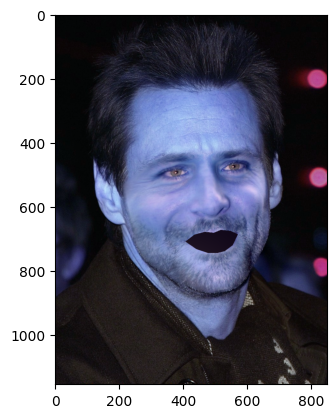

In [5]:
new_img = swap_with_keypoints(img, img2, landmarks_points, landmarks_points2)
plt.imshow(new_img)
plt.show()

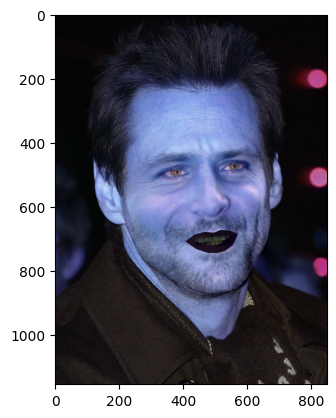

In [6]:
new_img = swap_with_keypoints(img2, new_img, landmarks_points2[60:], landmarks_points2[60:])
plt.imshow(new_img)
plt.show()